In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_csv("E:\\Trainings\\Complete Data Science Bootcamp - Udemy\\Cluster Analysis\\K-Means Clustering\\Example 1 from Lesson\\3.01. Country clusters.csv")
raw_data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [3]:
raw_data.shape

(6, 4)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
Country      6 non-null object
Latitude     6 non-null float64
Longitude    6 non-null float64
Language     6 non-null object
dtypes: float64(2), object(2)
memory usage: 320.0+ bytes


In [5]:
raw_data.describe()

,Latitude,Longitude
count,6.000000,6.000000
mean,38.971667,-9.531667
std,32.155820,86.523904
min,-25.450000,-103.770000
25%,45.415000,-73.232500
50%,48.950000,-0.065000
75%,53.295000,8.400000
max,62.400000,133.110000


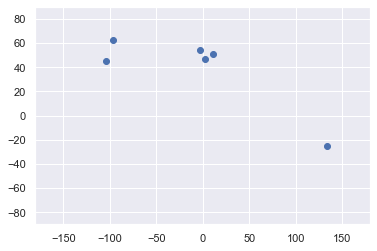

In [6]:
plt.scatter(raw_data['Longitude'],raw_data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [7]:
raw_data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [8]:
data = raw_data.copy()
data['Language'] = data['Language'].map({'English':0, 'French':1, 'German':2})
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [15]:
x = data.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [21]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1])

In [24]:
data_with_clusters = raw_data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


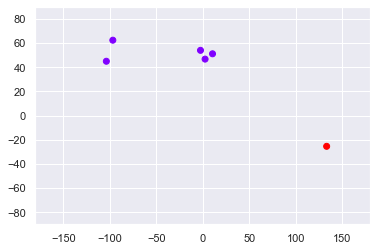

In [25]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [26]:
# Get the WCSS for the current solution
kmeans.inertia_

13208.95812

In [27]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [28]:
wcss

# 1 cluster - 42605.41356666667,
# 2 clusters - 13208.95812,
# 3 clusters - 290.10523333333333,
# 4 clusters - 113.91233333333332,
# 5 clusters - 39.00624999999998,
# 6 clusters - 0.0 (this is 0, as each point is a separate cluster)

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

In [30]:
number_clusters = range(1,7)

Text(0, 0.5, 'Within-cluster Sum of Squares')

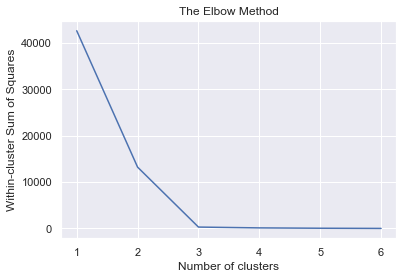

In [32]:
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')